In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#read csv and create a dataframe
df = pd.read_csv('Resources/Data_science_&stem_salaries.csv')
print(df)

                timestamp     company     level                         title  \
0       6/7/2017 11:33:27      Oracle        L3               Product Manager   
1      6/10/2017 17:11:29        eBay      SE 2             Software Engineer   
2      6/11/2017 14:53:57      Amazon        L7               Product Manager   
3       6/17/2017 0:23:14       Apple        M1  Software Engineering Manager   
4      6/20/2017 10:58:51   Microsoft        60             Software Engineer   
...                   ...         ...       ...                           ...   
62637   9/9/2018 11:52:32      Google        T4             Software Engineer   
62638   9/13/2018 8:23:32   Microsoft        62             Software Engineer   
62639  9/13/2018 14:35:59        MSFT        63             Software Engineer   
62640  9/16/2018 16:10:35  Salesforce  Lead MTS             Software Engineer   
62641   1/29/2019 5:12:59       apple      ict3             Software Engineer   

       totalyearlycompensat

In [3]:
print(df.columns)

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')


In [4]:
salaryDF = df[['company', 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary']]

In [5]:
print(salaryDF.head())

     company  totalyearlycompensation  yearsofexperience  yearsatcompany  \
0     Oracle                   127000                1.5             1.5   
1       eBay                   100000                5.0             3.0   
2     Amazon                   310000                8.0             0.0   
3      Apple                   372000                7.0             5.0   
4  Microsoft                   157000                5.0             3.0   

   basesalary  
0    107000.0  
1         0.0  
2    155000.0  
3    157000.0  
4         0.0  


In [6]:
X = salaryDF.iloc[:,2:]
y_train = salaryDF.iloc[:50000,1]
y_test = salaryDF.iloc[50000:,1]

rows = X.shape[0]
count = 0
N_TRAIN = 50000

train_err = {}
test_err = {}

In [7]:
def rmse(targets, predictions):
    return np.sqrt((np.square(predictions - targets)).mean())

In [12]:
#making the 5 models 
for i in range(1,11):
  A = np.ones([rows, (3*i)+1])  #array to store all values for each model 
  print(A.shape)
  for j in range(0,3):          #going through each coulmn 
    for k in range(1, i+1):     #
        A[:,count]=np.power(np.array(X.iloc[:,j]).T, k)
        count = count+1
        
  #splitting the x-values with monomials into training and testing
  print(A[1])
  x_train = A[0:N_TRAIN,:]
  x_test = A[N_TRAIN:,:]
  #cauclating the weight 'w'
  print(x_train.shape)
  w = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T.dot(y_train))
  #calculate training error
  y_train_pred = x_train.dot(w)
  rms_train = rmse(y_train, y_train_pred)
  train_err[i] = rms_train
  print(rms_train)
    
    
  #calculate test error
  y_test_pred = x_test.dot(w)
  rms_test = rmse(y_test, y_test_pred)
  print(rms_test)
  test_err[i] = rms_test
    
  count = 0

(62642, 4)
[5. 3. 0. 1.]
(50000, 4)
92469.43809773956
121382.52351504724
(62642, 7)
[ 5. 25.  3.  9.  0.  0.  1.]
(50000, 7)
91573.99026037076
129644.37305767962
(62642, 10)
[  5.  25. 125.   3.   9.  27.   0.   0.   0.   1.]
(50000, 10)
82679.30803703998
450246.9972901871
(62642, 13)
[  5.  25. 125. 625.   3.   9.  27.  81.   0.   0.   0.   0.   1.]
(50000, 13)
76200.18255097662
1486057.670630892
(62642, 16)
[5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03 3.000e+00 9.000e+00
 2.700e+01 8.100e+01 2.430e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00]
(50000, 16)
75412.2914714069
1535500.4793790847
(62642, 19)
[5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03 1.5625e+04
 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02 7.2900e+02
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00]
(50000, 19)
75363.32976777239
2845271.38744929
(62642, 22)
[5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03 1.5625e+04
 7.8125e+04 3.0000e+00 

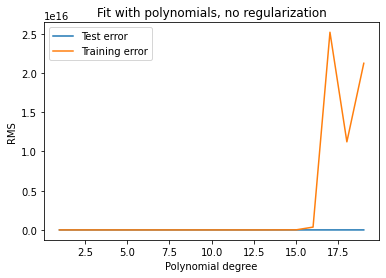

In [13]:
# Produce a plot of results.
plt.plot(list(train_err.keys()), list(train_err.values()))
plt.plot(list(test_err.keys()), list(test_err.values()))
plt.ylabel('RMS')
plt.legend(['Test error','Training error'])
plt.title('Fit with polynomials, no regularization')
plt.xlabel('Polynomial degree')
plt.show()